# Homework 2 - Logistic Regression
## CSCI 5622 - Spring 2019
***
**Name**: Jacob Tiede
***

This assignment is due on Canvas by **11.59 PM on Wednesday, February 26th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted. The only exception to this rule is that you may copy code directly from your own solution to homework 1.

## Overview 
***


Your task for this homework is to build a logistic regression model that implements stochastic gradient ascent. You'll apply it to the task of determining whether a number is 8 or 9

We start by importing and plotting the given data

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

### [ 70 points] Problem 1: Implementing the Logistic Regression Classifier for Binary Classification
***

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
import pickle, gzip       
import numpy as np

class Numbers:
    """
    Class to store MNIST data for images of 9 and 8 only
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        train_indices = np.where(self.train_y > 7)
        self.train_x, self.train_y = self.train_x[train_indices], self.train_y[train_indices]
        self.train_y = self.train_y - 8
 
        self.valid_x, self.valid_y = valid_set
        valid_indices = np.where(self.valid_y > 7)
        self.valid_x, self.valid_y = self.valid_x[valid_indices], self.valid_y[valid_indices]
        self.valid_y = self.valid_y - 8

In [3]:
data = Numbers('./mnist.pklz')

In this homework you'll implement a Logistic Regression classifier to take drawings of either an eight or a nine and output the corresponding label.
* [10 pts] Finish the `calculate_score` function to return the output of applying the dot product of the weights with the input parameter

* [10 pts] Finish the `sigmoid` function to return the output of applying the sigmoid function to the calculated score

* [10 pts] Finish the `compute_gradient` function to return the derivate of the cost w.r.t. the weights

* [10 pts] Finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly

* [10 pts] Finish the `mini_batch_update` function so that it performs mini-batch gradient descent on the batches of the training data set example and updates the weight vector correspondingly

In [4]:
from collections import defaultdict
class LogReg:
    
    def __init__(self, X, y, eta = 0.1):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        :method: This should be the name of the method (sgd_update or mini_batch_descent)
        :batch_size: optional argument that is needed only in the case of mini_batch_descent
        """
        self.X = X
        self.y = y
        self.w = self.initializeWeights() 
        self.eta = eta
        
    def initializeWeights(self):
        #This will initialize the weights to something close to, but not quite, zero
        w = np.zeros(self.X.shape[1])
        for i in range(0, len(w)):
            e = np.random.uniform(-.001, .001)
            w[i] = w[i] + e
        return w
    def calculate_score(self, x):
        """
        :param x: This can be a single training example or it could be n training examples
        :return score: Calculate the score that you will plug into the logistic function
        """
        # TODO: Compute the score to be fed to the sigmoid function
        score = np.dot(self.w, np.transpose(x))
        return(score)
    
    def sigmoid(self, score):
        """
        :param score: Either a real valued number or a vector to convert into a number between 0 and 1
        :return sigmoid: Calcuate the output of applying the sigmoid function to the score. This could be a single
        value or a vector depending on the input
        """
        # TODO: Complete this function to return the output of applying the sigmoid function to the score
        sigmoid = 1/(1+np.exp(-score))
        return(sigmoid)
        
    
    def compute_gradient(self, x, h, y):
        """
        :param x: Feature vector
        :param h: predicted class label
        :param y: real class label
        :return gradient: Return the derivate of the cost w.r.t to the weights
        """
        # TODO: Finish this function to compute the gradient
        gradient = np.dot(np.transpose(np.subtract(self.sigmoid(self.calculate_score(x)),y)), x)
        return(gradient)
        
     
    def sgd_update(self):
        """
        Compute a stochastic gradient update over the entire dataset to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """ 
        # TODO: Finish this function to do a stochastic gradient descent update over the entire dataset
        # and return the updated weight vector
        # Set these variables for convience
        x_i = self.X
        y = self.y
        w = self.w
        stepSize = self.eta
        # For each separate observation in X preform stocastic gradient descent
        for i in range(0, x_i.shape[0]):
            w = w - np.multiply(stepSize, self.compute_gradient(x_i[i,:], 0, y[i]))
            self.w = w
        return(w)
        
    
    def mini_batch_update(self, batch_size):
        """
        One iteration of the mini-batch update over the entire dataset (one sweep of the dataset).
        :param X: NumPy array of features (size : no of examples X features)
        :param y: Numpy array of class labels (size : no of examples X 1)
        :param batch_size: size of the batch for gradient update
        :returns w: Coefficients of the classifier (after updating)
        """
        # TODO: Performing mini-batch training follows the same steps as in stochastic gradient descent,
        # the only major difference is that we’ll use batches of training examples instead of one. 
        # Here we decide a batch size, which is the number of examples that will be fed into the 
        # computational graph at once.
        
        # n is set for ease of use
        n = self.X.shape[0]
        # k will keep track of where we are in our data set as we iterate through
        k = 0
        # each loop will increment k += batch_size indicating where our next batch will start. Since we need to 
        # run across all of X we stop after k is at most n + batch_size
        
        # NOTE: This will occationally over shoot the set entirely and give x_i and y to be an empty value
        # This does not affect the end result as it will simply give w = w - 0, so I decided to keep this 
        # implementation since it will work for any batch_size 
        while k < n + batch_size + 1:
            #make sure that the batch we select
            if k + batch_size <= n:
                x_i = self.X[k:k+batch_size,:]
                y = self.y[k:k+batch_size]
            else:
                x_i = self.X[k:n,:]
                y = self.y[k:n]
            # update k
            k = k + batch_size
            # set w for ease of use
            w = self.w
            # set step size for ease of use
            stepSize = self.eta
            # Update using gradient descent
            w = w - np.multiply(stepSize, self.compute_gradient(x_i, 0, y))
            # Update w in the object
            self.w = w
        return(w)
        
    
    def progress(self, test_x, test_y, update_method, *batch_size):
        """
        Given a set of examples, computes the probability and accuracy
        :param test_x: The features of the test dataset to score
        :param test_y: The features of the test 
        :param update_method: The update method to be used, either 'sgd_update' or 'mini_batch_update'
        :param batch_size: Optional arguement to be given only in case of mini_batch_update
        :return: A tuple of (log probability, accuracy)
        """
        # TODO: Complete this function to compute the predicted value for an example based on the logistic value
        # and return the log probability and the accuracy of those predictions
        
        # Check which update method to use and then update
        if update_method == "sgd_update":
            self.sgd_update()
        else:
            self.mini_batch_update(batch_size[0])
        #find the log likelihood
        predictions = self.sigmoid(self.calculate_score(test_x))
        logProb = sum(np.add(np.multiply(test_y,np.log(predictions)), np.multiply(1-test_y, np.log(1-predictions))))
        
        #set these variables for convience
        maxi = max(self.y)
        mini = min(self.y)
        #using a threshold of .5 put each prediction into a single class (0 or 1)
        for i in range(0, len(predictions)):
            if predictions[i] >= .5:
                predictions[i] = maxi
            else:
                predictions[i] = mini
        #Count the number of examples that we got right in the training
        numRight = 0
        for i in range(0, len(predictions)):
            if predictions[i] == test_y[i]:
                numRight = numRight + 1
        # calculate the accuracy as a percent
        accuracy = numRight/len(test_y)
        return(logProb, accuracy)
    
    def shuffle(self):
        #Shuffles the data
        n = len(self.y)
        shuffledIndices = np.random.choice(n, n, replace = False)
        self.X = self.X[shuffledIndices]
        self.y = self.y[shuffledIndices]

In [5]:
import unittest

class LogRegTester(unittest.TestCase):
    def setUp(self):
        self.X = np.array([[0.1, 0.3 ], [0.4, 0.6], [0.8, 0.1], [0.8, 0.1], [0.5, 0.8]])
        self.y = np.array([0,  0, 1, 1,  0])
        self.log_reg_classifier_1 = LogReg(self.X, self.y, 0.5)
        self.log_reg_classifier_2 = LogReg(self.X, self.y, 0.5)
        
    def test_sgd_update(self):
        """
        Test sgd_update function from LogReg
        """
        weights = self.log_reg_classifier_1.sgd_update()
        self.assertEqual(round(weights[0], 2), 0.16)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_mini_batch_update(self):
        """
        Test mini_batch_update function from LogReg
        """
        weights = self.log_reg_classifier_2.mini_batch_update(2)
        self.assertEqual(round(weights[0], 2), 0.17)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_progress_sgd_update(self):
        """
        Test progress function from LogReg with method = 'sgd_update'
        """
        self.log_reg_classifier_1 = LogReg(self.X[:4], self.y[:4], 0.5)
        log_prob, accuracy = self.log_reg_classifier_1.progress(self.X[4:], self.y[4:], 'sgd_update')
        self.assertEqual(round(log_prob, 1), -0.7)  # Changed to round 1.
        self.assertEqual(accuracy, 0)
        
        
        
    
    #BEGIN Workspace
    #Add more test functions as required
    #HINT - You'll want to make sure your
    #END Workspace
    
tests = LogRegTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In [6]:
# DO NOT DELETE THIS CELL !!!

In [7]:
# DO NOT DELETE THIS CELL !!!

In [8]:
# DO NOT DELETE THIS CELL !!!

In [9]:
# DO NOT DELETE THIS CELL !!!

In [10]:
# DO NOT DELETE THIS CELL !!!

**Q:** After completing the class above, loop over the training data and perform ___stochastic gradient descent___ for 10 epochs, and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* [2.5 pts] PART A : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __training sets__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

* [2.5 pts] PART B : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __validation set__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

Don't forget to shuffle your training data after each epoch.

Implement part A below. DO NOT DELETE THE CELL

/home/jat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in log
/home/jat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in multiply


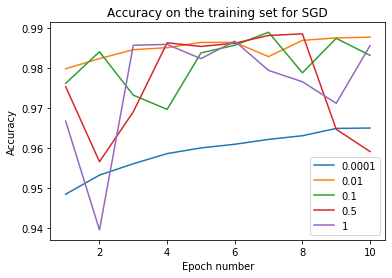

In [11]:
#Values of Eta that we should check
etaVals = [.0001, .01, .1, .5, 1]
#Initialize a vector to keep track of the accuracy at each epoch
acc = []
# since we are looking at 10 epochs
numIter = np.linspace(1,10, 10)
# Append the bias
X_train = np.append(np.ones((len(data.train_y), 1)), data.train_x, 1)
#For each step size step through 10 epochs and record accuracy
for i in etaVals:
    acc = []
    # make a logistic regression object with learning rate i
    logRegObj = LogReg(X_train, data.train_y, i)
    #step through 10 epochs
    for j in range(0,10):
        #Shuffle before each stochastic descent
        logRegObj.shuffle()
        #Get the accuracy after the epoch and append it to the list
        acc.append(logRegObj.progress(X_train, data.train_y, 'sgd_update')[1])
    #Plot Accuracy vs epoch
    plt.plot(numIter, acc, label = i)
#Make the plot look good
plt.legend(loc="lower right")
plt.title("Accuracy on the training set for SGD")
plt.xlabel("Epoch number")
plt.ylabel("Accuracy")
plt.show()

Implement part B below. DO NOT DELETE THE CELL

/home/jat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in log
/home/jat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in multiply


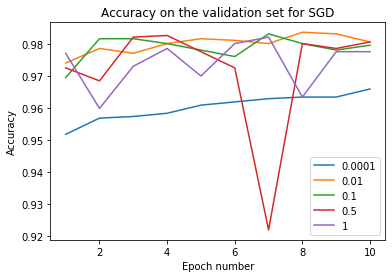

In [12]:
#see above for comments on the logic (as it is similar to the first graph)
etaVals = [.0001, .01, .1, .5, 1]
acc = []
numIter = np.linspace(1,10, 10)
#Append bias
X_valid = np.append(np.ones((len(data.valid_y), 1)), data.valid_x, 1)
for i in etaVals:
    acc = []
    logRegObj = LogReg(X_train, data.train_y, i)
    for j in range(0,10):
        logRegObj.shuffle()
        acc.append(logRegObj.progress(X_valid, data.valid_y, 'sgd_update')[1])
    plt.plot(numIter, acc, label = i)
plt.legend(loc="lower right")
plt.title("Accuracy on the validation set for SGD")
plt.xlabel("Epoch number")
plt.ylabel("Accuracy")
plt.show()
#raise NotImplementedError()

**Q:** After completing the class above, loop over the training data and perform ___mini batch gradient descent___ for 10 epochs, and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* [2.5 pts] PART C : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __training sets__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

* [2.5 pts] PART D : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __validation set__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

Don't forget to shuffle your training data after each epoch.

Implement part C below. DO NOT DELETE THE CELL

/home/jat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in log
/home/jat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in multiply
/home/jat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp


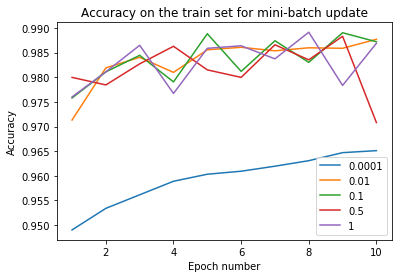

In [13]:
#see above for comments on the logic (as it is similar to the first graph)
etaVals = [.0001, .01, .1, .5, 1]
acc = []
numIter = np.linspace(1,10, 10)
for i in etaVals:
    acc = []
    logRegObj = LogReg(X_train, data.train_y, i)
    for j in range(0,10):
        logRegObj.shuffle()
        acc.append(logRegObj.progress(X_train, data.train_y, 'mini_batch_update', 50)[1])
    plt.plot(numIter, acc, label = i)
plt.legend(loc="lower right")
plt.title("Accuracy on the train set for mini-batch update")
plt.xlabel("Epoch number")
plt.ylabel("Accuracy")
plt.show()

Implement part D below. DO NOT DELETE THE CELL

/home/jat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in log
/home/jat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in multiply
/home/jat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp


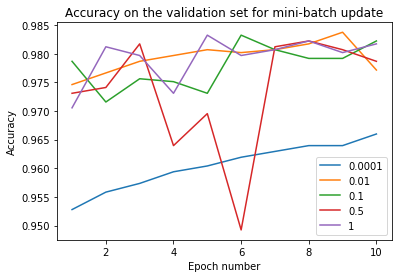

In [14]:
#see above for comments on the logic (as it is similar to the first graph)
etaVals = [.0001, .01, .1, .5, 1]
acc = []
numIter = np.linspace(1,10, 10)
for i in etaVals:
    acc = []
    logRegObj = LogReg(X_train, data.train_y, i)
    for j in range(0,10):
        logRegObj.shuffle()
        acc.append(logRegObj.progress(X_valid, data.valid_y, 'mini_batch_update', 50)[1])
    plt.plot(numIter, acc, label = i)
plt.legend(loc="lower right")
plt.title("Accuracy on the validation set for mini-batch update")
plt.xlabel("Epoch number")
plt.ylabel("Accuracy")
plt.show()
#Do this becuase I don't have a lot of RAM
del(logRegObj)

**Q:** [5 pts] Describe the role of learning rate (eta) on the efficiency of convergence during training?

The learning rate appears to affect the variance of the accuracy. For instance, when eta = .00001 we are still increasing accuracy with each step, just not as fast as we would like. Eta = .01 appears to be a sweet spot in that it gets high accuracy quickly, and stays at that high accuracy. Anything higher than Eta = .01 appear to step over the minimum at least once, decreasing the accuracy sporatically as it keeps over shooting the minimum.

**Q:** [5 pts] Describe the role of the number of epochs on validation accuracy?

Generally (for step sizes sufficiently small so that we don't get strange behavior) each epoch monotonically increases the accuracy. This should make sense, because we are trying to minimize the -log likelihood, so each time we step in the negative gradient direction we should be increasing the likelihood of our model, thus increasing the accuracy.

### [ 30 points] Problem 2: Implementing the Logistic Regression Classifier for Multinomial Classification

You will not create a classifier that is commonly referred to as Multinomial Logistic Regression. The particular method you will be implementing is **One Vs All** or **One Vs Rest**. The dataset will be the MNIST dataset which includes all digits 0-9. You are free to use the functions you created above as needed.

* [5 pts] 2.1 Normalize your data.
* [5 pts] 2.2 Transform your outputs into a set of binary features via one-hot encoding.
* [5 pts] 2.3 Write get_optimal_parameters - train all ten models at once.
* [5 pts] 2.4 Calculate the accuracy of your model on Train and Test data.
* [5 pts] 2.5 Generate a confusion matrix on test and train Data.
* [5 pts] 2.6 Predict the labels of the first ten datapoints from your test set alongside the images of those same datapoints.

In [15]:
class Numbers2:
    """
    Class to store MNIST data for images of 0-9
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        self.test_x, self.test_y = valid_set

[5 0 4 1 9 2 1 3 1 4]
true label: 6


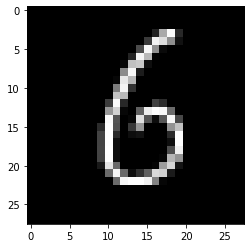

In [16]:
data2 = Numbers2('./mnist.pklz')
print(data2.train_y[:10])
def view_digit(example, label=None):
    if label is not None: print("true label: {:d}".format(label))
    plt.imshow(example.reshape(28,28), cmap='gray');
view_digit(data2.train_x[18],data2.train_y[18])

In [17]:
from sklearn import preprocessing

class MultiLogReg:
    
    def __init__(self, X, y, eta = 0.1):
        self.X = self.normalize_data(X)
        self.y = self.one_hot_encoding(y)
        self.eta = eta
    
    def getX(self):
        # Only did this to save on RAM further down the line (my VM only has like 1GB of RAM to use). I'll use it
        # So I don't have to store another instance of the dataset in memory
        return(self.X)
    
    def one_hot_encoding(self, y):
        # TO DO: Represent the output vector y as a one hot encoding. Create a matrix of dimensions (m X 10) 
        # where m = number of examples, and 10 for number of classes
        # if the class for the ith example is 7, then y[i][7] = 1 and the for k != 7, y[i][k] = 0.
        
        #Initialize the matrix
        m = np.zeros((len(y), 10))
        #k keeps track of the row we are on of our y matrix
        k = 0
        #construct the matrix
        for i in np.nditer(y):
            m[k,i] = 1
            k += 1
        return(m)
    
        
    def normalize_data(self, X):
        # TO DO: Normalize the feature values of dataset X using the mean and standard deviation of the respective features
        
        # I both normalize and scale to ensure that my columns are all unit vectors, with normal distributions
        # This combats some size related errors in the data set
        X[:, 1:X.shape[1]] = preprocessing.scale(X[:, 1:X.shape[1]])
        X[:, 1:X.shape[1]] = preprocessing.normalize(X[:, 1:X.shape[1]])
        return(X)
    def get_optimal_parameters(self):
        # TO DO: This is the main training loop. You will have to find the optimal weights for all 10 models
        # Each model is fit to it's class which is (0-9), and the cost function will be against all of the other 
        # numbers "the rest".
        
        # Initialize a matrix to keep track of each of the the weights output by our logistic regression model
        # The ith column will contain the weights for the ith model
        optWeights = np.zeros((self.X.shape[1], 10))
        # This vector will hold the all vs 1 representation of our responce variable (ie 1 if response = the class
        # we are looking for 0 otherwise)
        allVOne = np.zeros(self.X.shape[0])
        #Use a hold out set: 80% for training 20% for validation
        trainingSet = self.X[0:int(np.floor(.8*len(allVOne))), :]
        holdSet = self.X[int(np.floor(.8*len(allVOne))+1):len(allVOne), :]
        for i in range(0, 10):
            # Populate our vector for each class to train it (with allVOne[j] = 1 if the corresponding class we are
            # training on is the class of observation j, and zero otherwise)
            for j in range(0, self.X.shape[0]):
                if self.y[j,i] == 1:
                    allVOne[j] = 1
                else:
                    allVOne[j] = 0
            # make a logistic regression model to train
            obj = LogReg(trainingSet, allVOne[0:int(np.floor(.8*len(allVOne)))], self.eta)
            oldAcc = 0
            obj.shuffle()
            newAcc = obj.progress(holdSet, allVOne[int(np.floor(.8*len(allVOne)))+
                                                                1:len(allVOne)], "mini_batch_update",250)[1]
            # Fit the model, stopping when we start getting diminishing returns in accuracy in the hold out set
            while np.abs(newAcc - oldAcc) > .001:
                obj.shuffle()
                oldAcc = newAcc
                newAcc = obj.progress(holdSet, allVOne[int(np.floor(.8*len(allVOne)))+
                                                                    1:len(allVOne)], "mini_batch_update",250)[1]
            #record what we found to be the optimal weights
            optWeights[:, i] = obj.w
        return(optWeights)
    
    #Both of these functions taken from LogReg class, will be used in predict, only added a w param in calculate_score
    def calculate_score(self, x, w):
        """
        :param x: This can be a single training example or it could be n training examples
        :param w: the weights (EDITED TO INCLUDE THIS)
        :return score: Calculate the score that you will plug into the logistic function
        """
        # TODO: Compute the score to be fed to the sigmoid function
        score = np.dot(w, np.transpose(x))
        return(score)
    
    def sigmoid(self, score):
        """
        :param score: Either a real valued number or a vector to convert into a number between 0 and 1
        :return sigmoid: Calcuate the output of applying the sigmoid function to the score. This could be a single
        value or a vector depending on the input
        """
        # TODO: Complete this function to return the output of applying the sigmoid function to the score
        sigmoid = 1/(1+np.exp(-score))
        return(sigmoid)
    def predict(self, test_image, test_label, models = np.zeros((2,2))):
        # TO DO: This function should return the probabilities predicted by each of the models for some given 
        # input image. The probabilities are sorted with the most likely being listed first.
        # Return a vector of shape (10, 2) with the first column holding the number and the second column with
        # the probability that the test_image is that number
        
        # If we have not prefitted the models: fit the models
        if models.all() == 0:
            models = self.get_optimal_parameters()
        # Initialize the matrix of probabilities and corresponding class
        probs = np.zeros((10,2))
        # Calculate the probability of each class using the test_image
        for i in range(0, models.shape[1]):
            probs[i,0] = i
            #Use the ith column of our models matrix for the weights of the ith model
            probs[i,1] = self.sigmoid(self.calculate_score(test_image, models[:, i]))
        #sort in descending order and return
        return probs[(-1*probs[:,1]).argsort()]

In [18]:
# DO NOT DELETE THIS CELL !!!

In [19]:
# DO NOT DELETE THIS CELL !!!

### QUESTION ###
It is important to know how well your model did on the whole. You need to report the ___accuracy as a percentage___ on the training set and the test set from Numbers2. You should also plot a ___confusion matrix___ for both, just like you did on the last homework and mention the numbers that were misclassified the most. Finally use the predict method to predict the labels for the FIRST 10 instances from the test set, while also plotting the respective images for validation.

Train a MultiLogReg Model in the cell below. DO NOT DELETE THE CELL

In [20]:
#Kept getting dead kernels if these variables were already in the workspace when I ran this cell
if "models" in locals() and "X" in locals() and "testInstance" in locals():
    del(models)
    del(testInstance)
    del(X)
# Append the bias

X = np.append(np.ones((len(data2.train_y), 1)), data2.train_x, 1)
#Train the models
testInstance = MultiLogReg(X, data2.train_y, .1)
del(X)
models = testInstance.get_optimal_parameters()

Compute the accuracy on the train and test data from Numbers2 using the model you trained above. DO NOT DELETE THE CELL

In [21]:
#Initialize a count of the number of data points our model got correct
numCorrectTest = 0
# Get the data on the training set
train_x = testInstance.getX()
# Normalize the test data
test_x = np.append(np.ones((len(data2.test_y), 1)), data2.test_x, 1)
test_x[:, 1:test_x.shape[1]] = preprocessing.scale(test_x[:, 1:test_x.shape[1]])
test_x[:, 1:test_x.shape[1]] = preprocessing.normalize(test_x[:, 1:test_x.shape[1]])

#for each data point check if our model is correct, increment numCorrectTest if we are
for i in range(0,len(data2.test_y)):
    temp = testInstance.predict(test_x[i,:], data2.test_y[i], models)
    #Because temp is sorted in decreasing order of accuracy we need only look at 0,0
    if temp[0,0] == data2.test_y[i]:
        numCorrectTest += 1
#Similar to above, but for the training set
numCorrectTrain = 0
for i in range(0,len(data2.train_y)):
    temp = testInstance.predict(train_x[i,:], data2.train_y[i], models)
    if temp[0,0] == data2.train_y[i]:
        numCorrectTrain += 1
#Print out the accuracies
print("Accuracy on the training set:")
print(numCorrectTrain/len(data2.train_y))
print("Accuracy on the test set:")
print(numCorrectTest/len(data2.test_y))
    

Accuracy on the training set:
0.90724
Accuracy on the test set:
0.9151


Plot the confusion matrix on Test and Train Data using the model you trained before. DO NOT DELETE THE CELL

In [22]:
#initialize a confusion matrix of the correct size
confusionTrain = np.zeros((10,10))
#For each data point in the training set increment out matrix using the rows as the predicted value, and the 
#columns as the actual values
for i in range(0,len(data2.train_y)):
    temp = testInstance.predict(train_x[i,:], data2.train_y[i], models)
    confusionTrain[int(temp[0,0]), data2.train_y[i]] += 1
#Suppress scientific notation to more easily view the matrix
np.set_printoptions(suppress=True)
print("Confusion Matrix for the Training Set:")
print(confusionTrain)

#Similar to above but for the test set
confusionTest = np.zeros((10,10))
for i in range(0,len(data2.test_y)):
    temp = testInstance.predict(test_x[i,:], data2.test_y[i], models)
    confusionTest[int(temp[0,0]), data2.test_y[i]] += 1
np.set_printoptions(suppress=True)
print("Confusion Matrix for the Test Set:")
print(confusionTest)

Confusion Matrix for the Training Set:
[[4786.    2.   48.   28.    6.   73.   42.   32.   48.   44.]
 [   2. 5485.   47.   39.   26.   41.   19.   53.  160.   26.]
 [  18.   34. 4362.  126.   36.   24.   47.   55.   51.   20.]
 [  12.   18.   85. 4509.   14.  183.    2.   25.  119.   92.]
 [  11.    5.   68.    8. 4436.   51.   22.   61.   22.  140.]
 [  18.   28.   10.  130.   13. 3807.   56.   10.  132.   26.]
 [  43.   12.  120.   26.   58.  103. 4720.    6.   45.    4.]
 [   3.   13.   86.   79.   12.   19.    3. 4719.   19.  210.]
 [  38.   74.  124.  106.   52.  146.   39.   14. 4166.   54.]
 [   1.    7.   18.   50.  206.   59.    1.  200.   80. 4372.]]
Confusion Matrix for the Test Set:
[[ 962.    0.    6.    7.    2.   14.    3.   11.    5.    9.]
 [   0. 1034.    8.    5.   11.    4.    4.   11.   37.    9.]
 [   5.    4.  887.   13.    2.   12.   13.    5.   10.    2.]
 [   2.    5.   18.  919.    2.   48.    0.   12.   26.   16.]
 [   2.    1.   12.    1.  915.    2.    6.

Predict Labels of First 10 datapoints from your test set and also the plot their images in the cell below. DO NOT DELETE THE CELL

true label: 3
predicted label: 
3.0


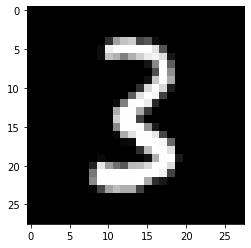

true label: 8
predicted label: 
8.0


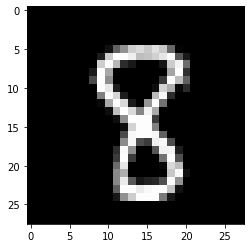

true label: 6
predicted label: 
6.0


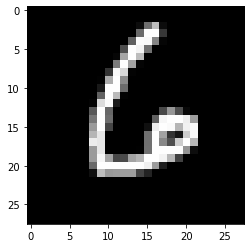

true label: 9
predicted label: 
9.0


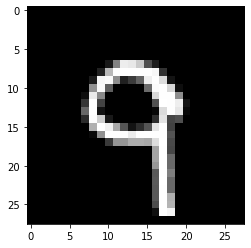

true label: 6
predicted label: 
6.0


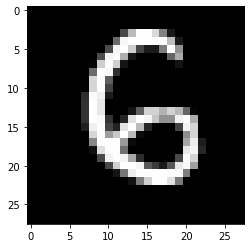

true label: 4
predicted label: 
4.0


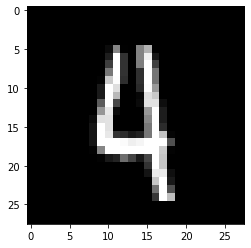

true label: 5
predicted label: 
5.0


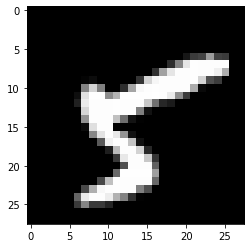

true label: 3
predicted label: 
5.0


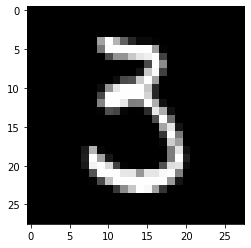

true label: 8
predicted label: 
8.0


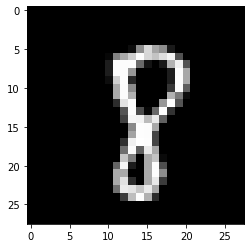

true label: 4
predicted label: 
4.0


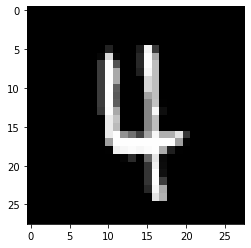

<Figure size 432x288 with 0 Axes>

In [23]:
# plot each digit along with its acutal class, and predicted class
for i in range(0,10):
    view_digit(data2.test_x[i], data2.test_y[i])
    print("predicted label: ")
    temp = testInstance.predict(test_x[i,:], data2.test_y[i], models)
    print(temp[0,0])
    plt.show()
    plt.figure(i+1)